# Datattack - Tire Identification Challenge

## 0. Imports

In [2]:
import os
import numpy as np
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F
import fiftyone.utils.coco as fouc
import pytesseract

## 1. Loading

In [3]:
import os

# Load COCO formatted train set
# The dataset_dir, should contain a 'data' folder inside with all the images of the dataset
train = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    dataset_dir ="dataset/",
    labels_path=f"{os.getcwd()}/dataset/data/labels_train.json",
    include_id=True,
    extra_attrs = True
)

train

 100% |█████████████████| 295/295 [2.5s elapsed, 0s remaining, 114.7 samples/s]      


Name:        2022.05.15.10.45.12
Media type:  image
Num samples: 295
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    coco_id:    fiftyone.core.fields.IntField

## 2. Visualization

In [4]:
session = fo.launch_app(train)

In [5]:
def show_image(image):
    if (len(image.shape) == 3):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cmap = None

    else:
        cmap = "gray"

    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

## 3. Transformation

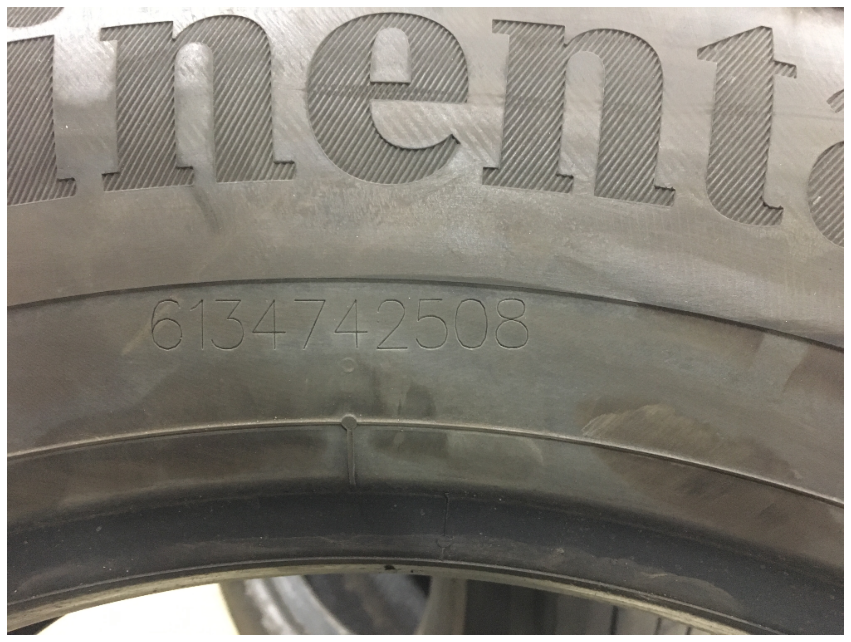

In [6]:
import cv2
import matplotlib.pyplot as plt

sample = list(train)[0]
image = cv2.imread(sample.filepath)
image = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))

plt.rcParams['figure.figsize'] = [15, 15]

show_image(image)

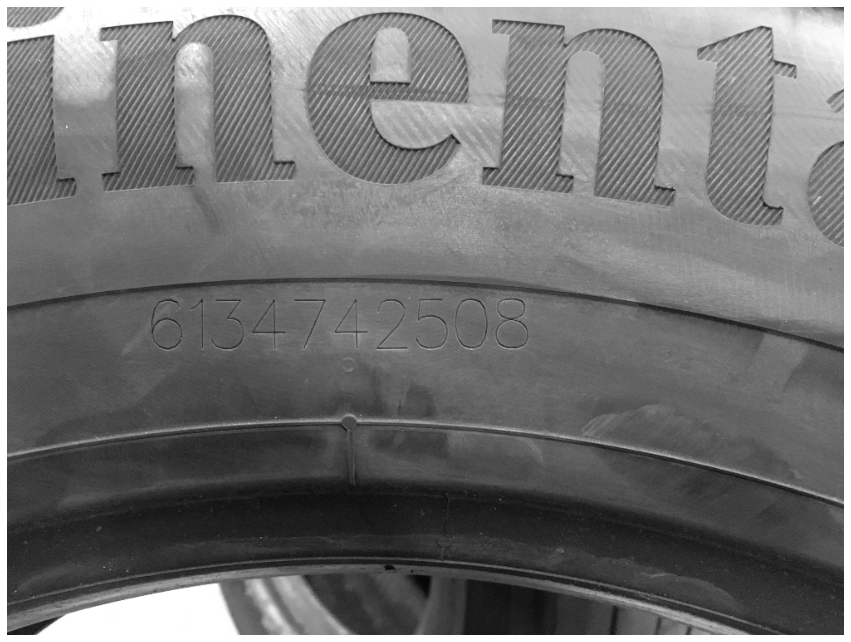

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image(gray)

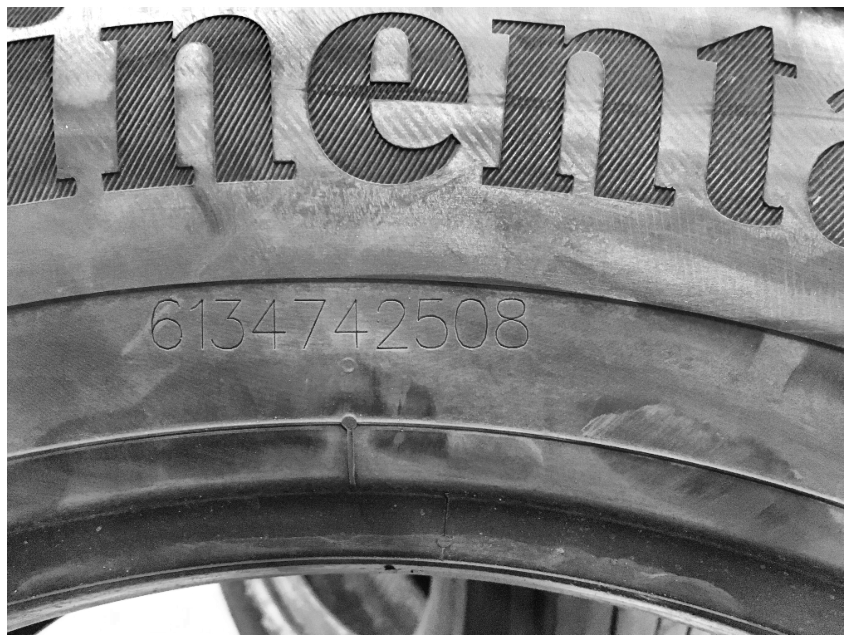

In [8]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = clahe.apply(gray)

show_image(gray)

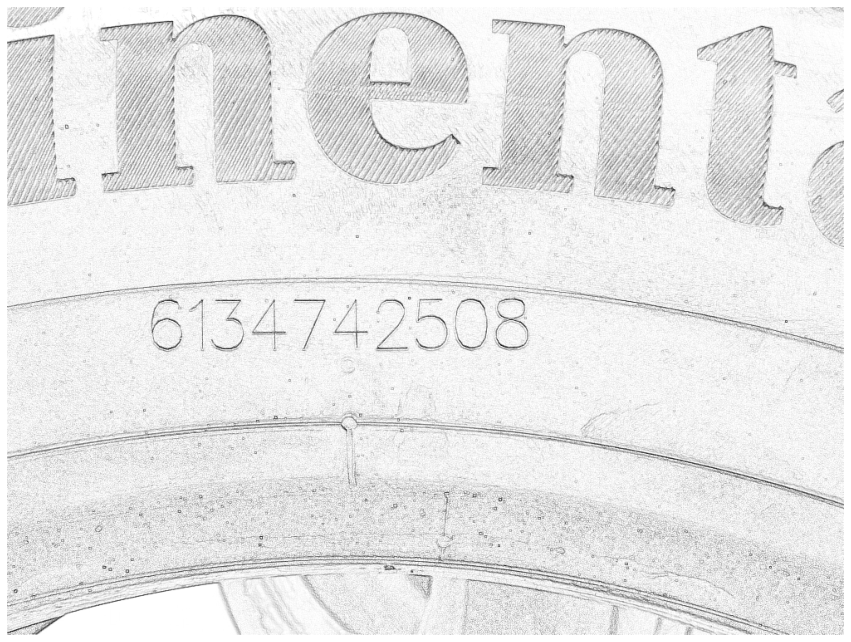

In [9]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
gray = cv2.divide(image, bg, scale=255)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

show_image(gray)

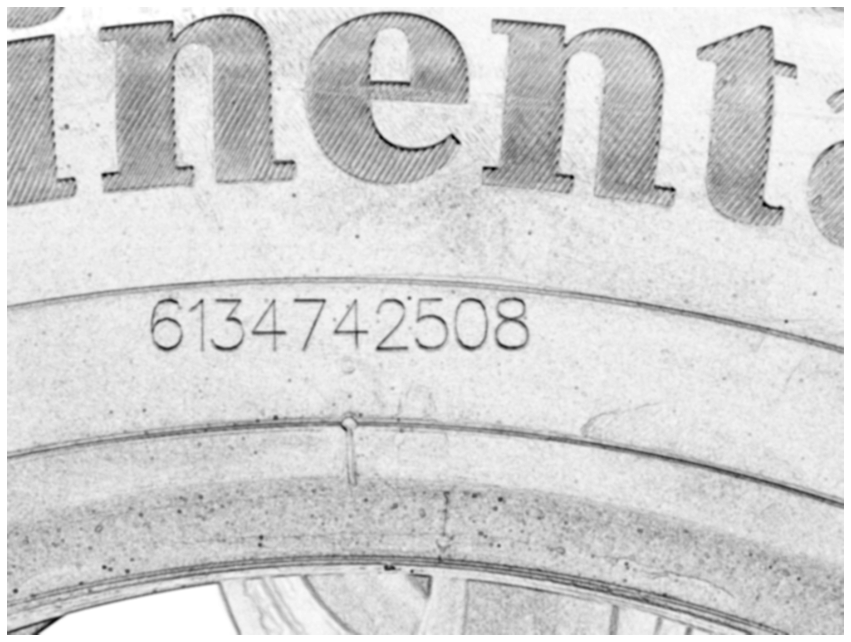

In [30]:
blur = cv2.GaussianBlur(gray, (7, 7), 0)

show_image(blur)

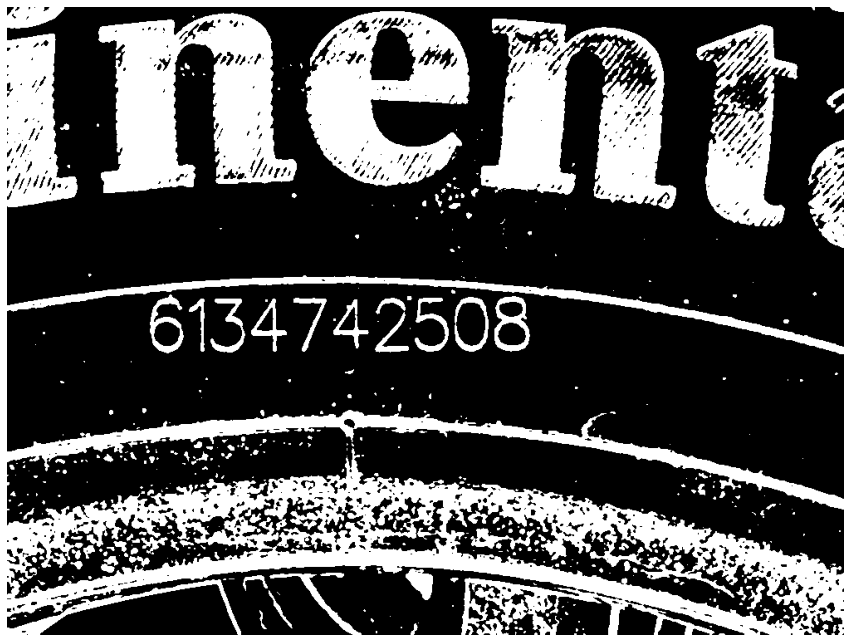

In [46]:
_, thresholded = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

show_image(thresholded)

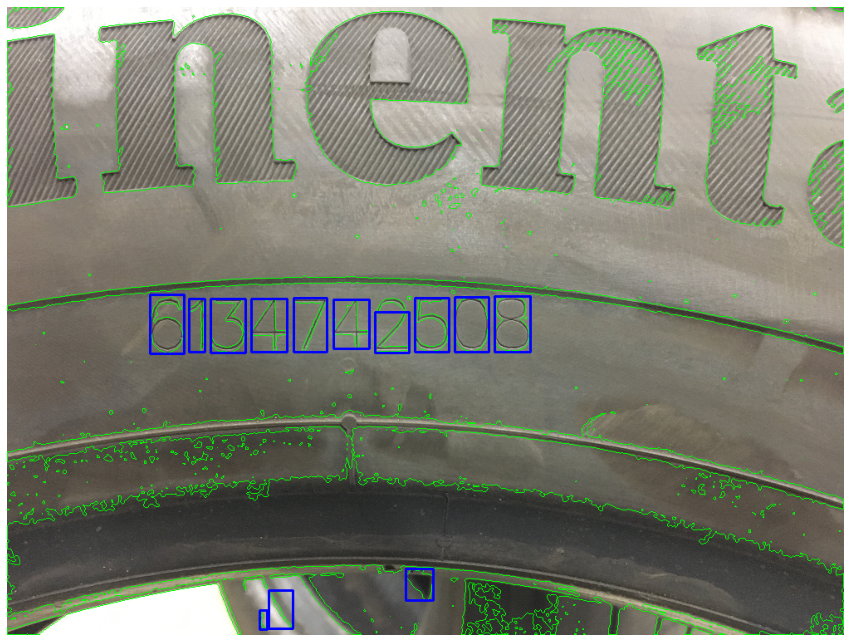

In [61]:
contours, _ = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
drawing = image.copy()

cv2.drawContours(drawing, contours, -1, (0, 255, 0), 1)

rects = []

for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)

  if h < 20 or h > 100 or h / w < 1.1:
    continue

  rects.append((x, y, w, h))

  drawing = cv2.rectangle(drawing, (x, y), (x + w, y + h), (255, 0, 0), 2)

show_image(drawing)

rects.sort(key=lambda x: x[0])

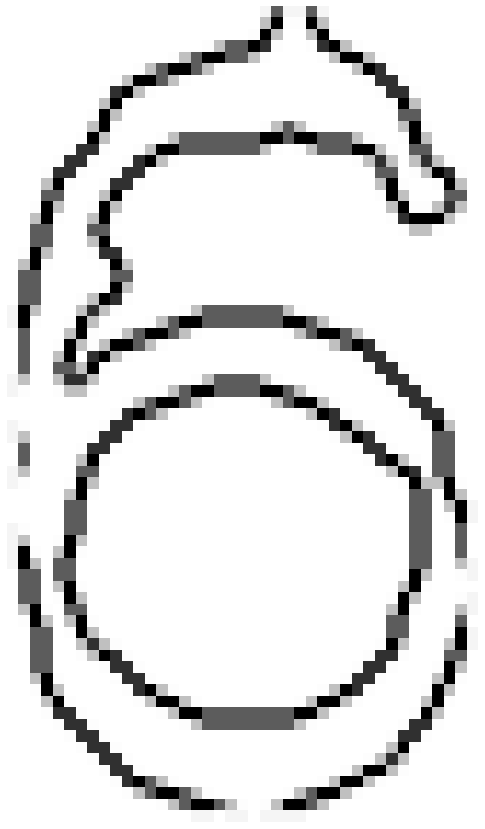

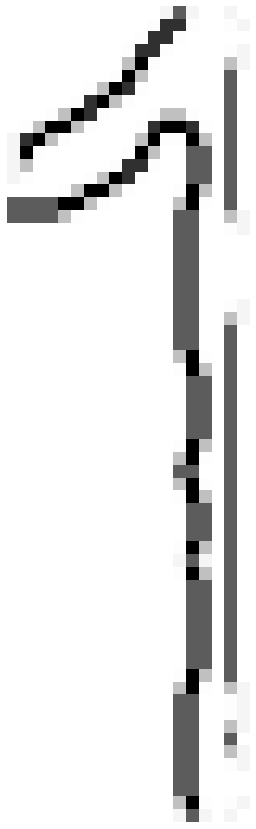

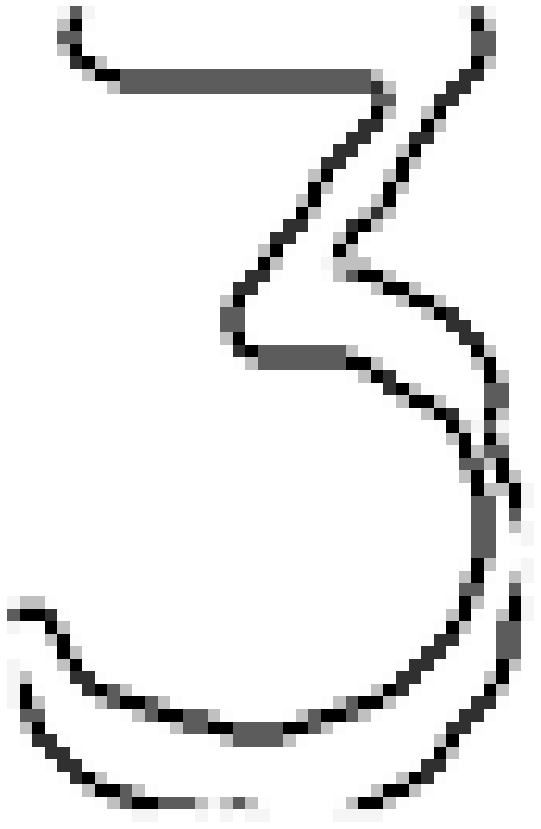

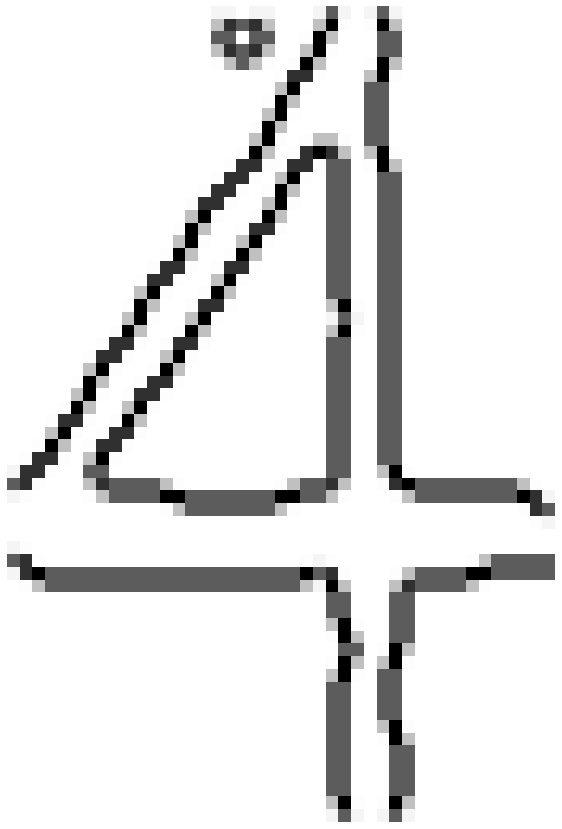

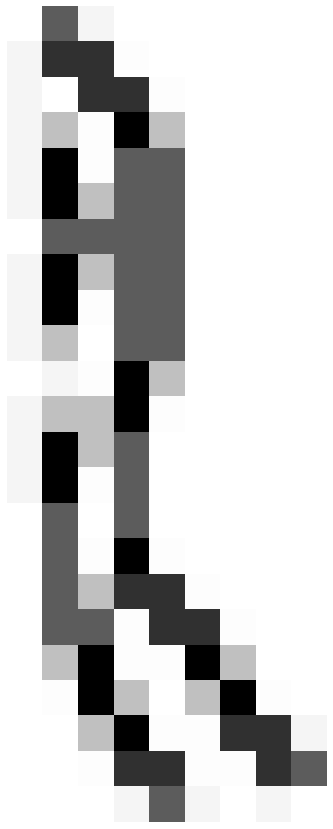

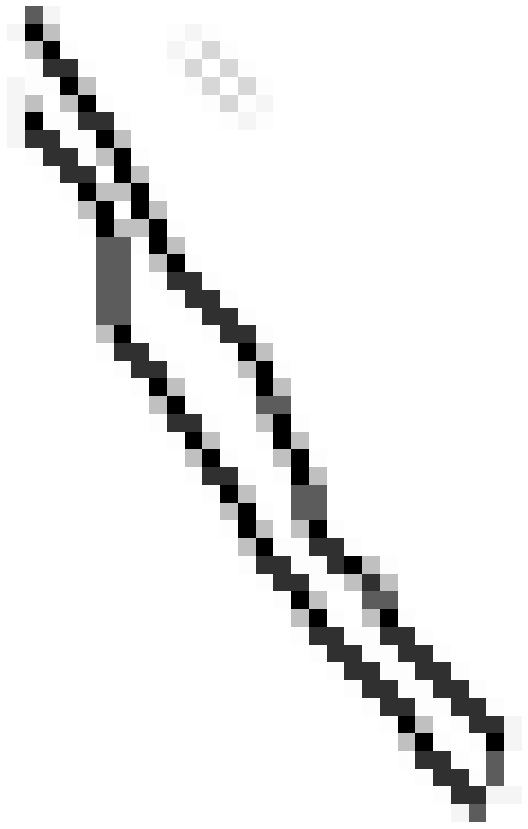

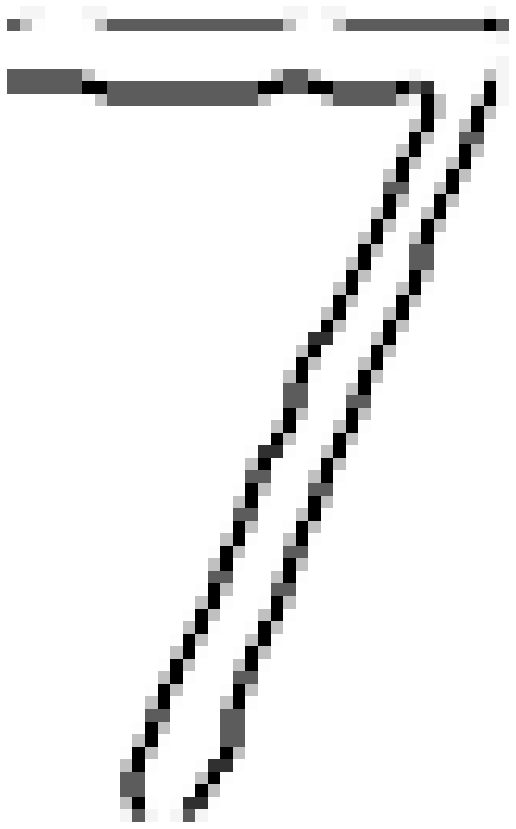

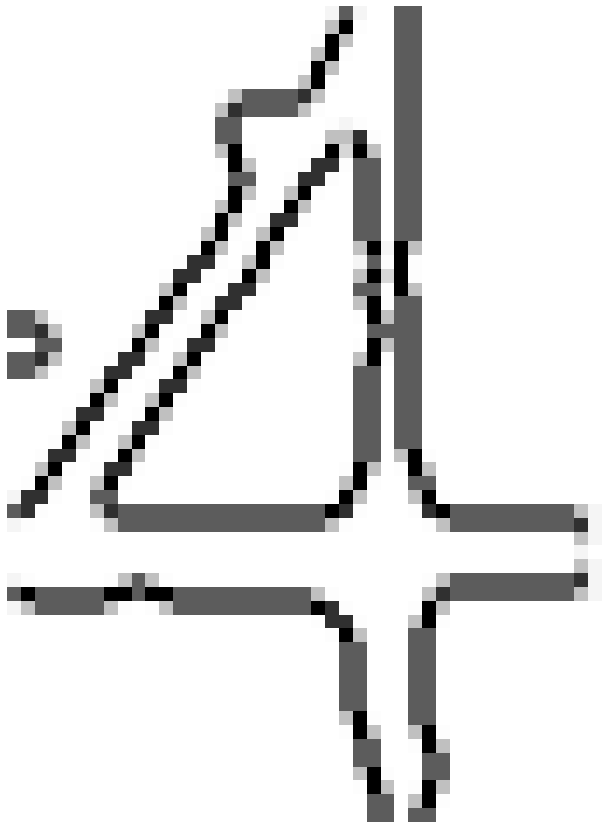

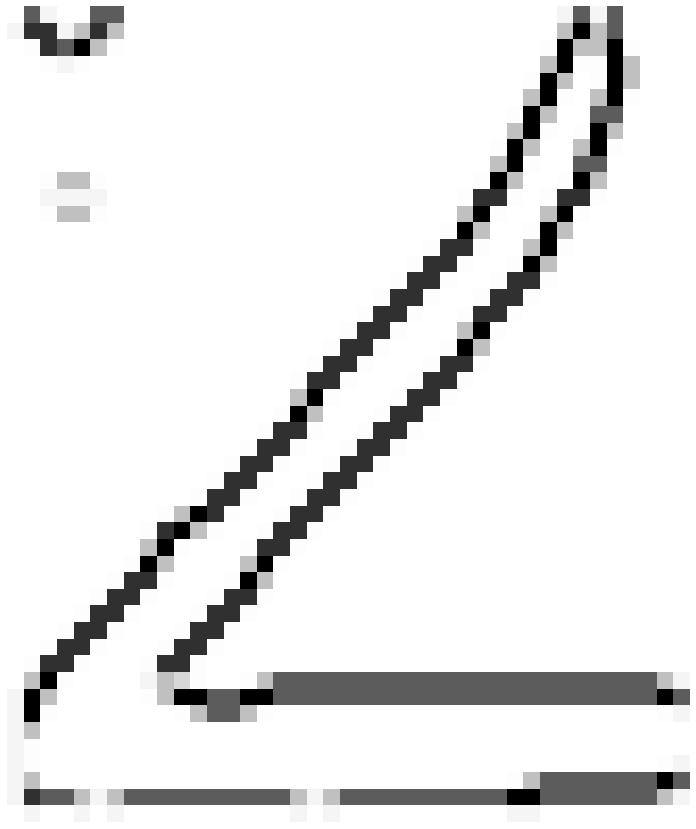

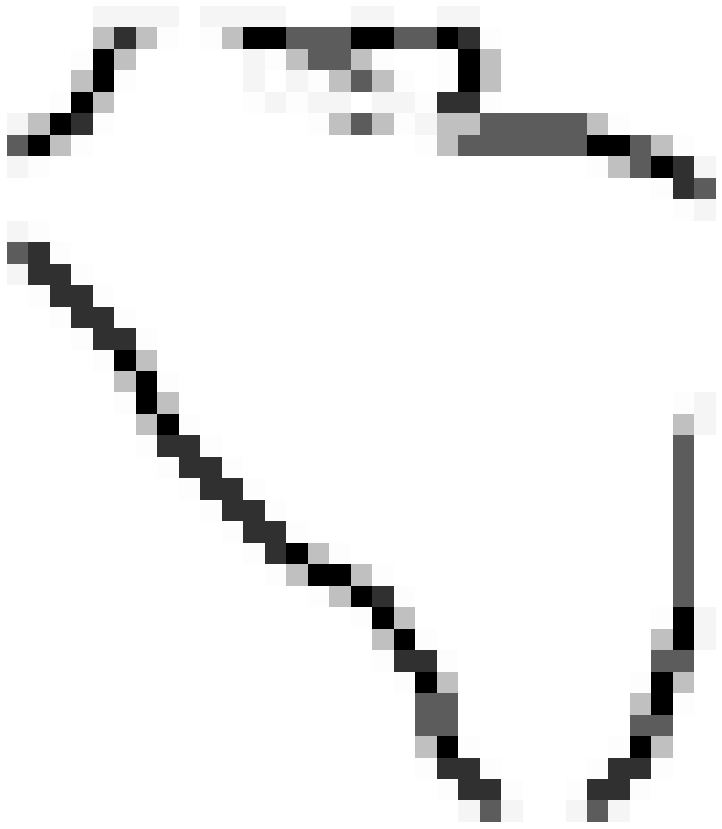

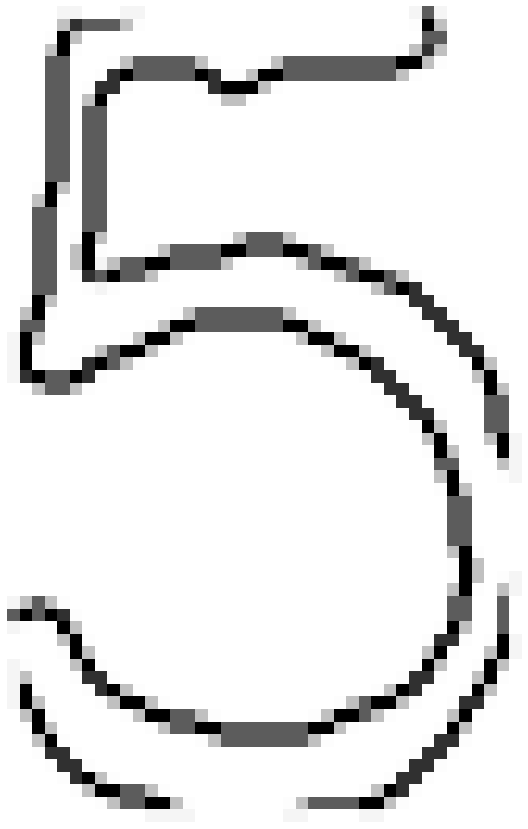

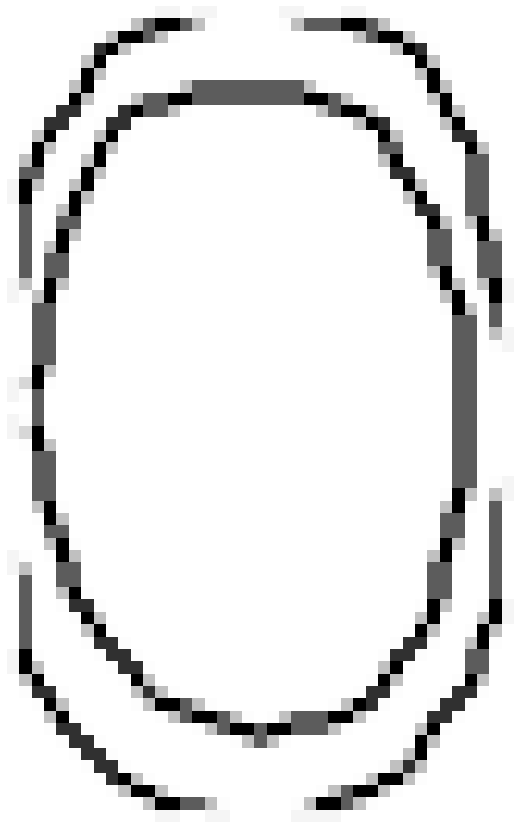

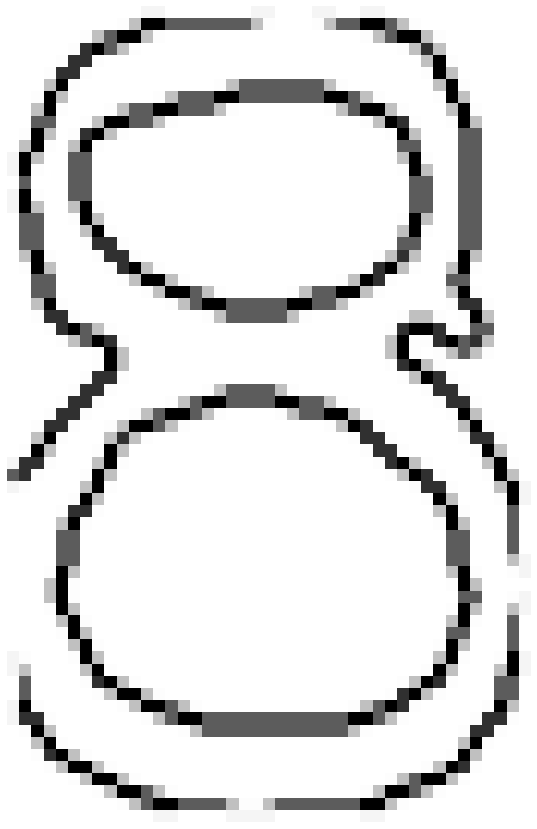

In [60]:
for rect in rects:
    x, y, w, h = rect
    crop = thresholded[y:y + h, x:x + w]

    corners = cv2.cornerHarris(crop, 1, 3, 0.05)
    corners[corners > 0.01 * corners.max()] = 255

    show_image(corners)

# 4. Proposed Solution

In [55]:
from IPython. display import Image
from IPython.display import HTML, display

display(HTML("<table><tr><td><img src='https://i.kym-cdn.com/entries/icons/original/000/035/431/cover9.jpg'></td><td><img src='https://cdn.continental.com/fileadmin/__imported/sites/corporate/_international/english/hubpages/10_20press/01_press_releases/05_20plt/2019/2019-03-18-summer-car_4.png'></td></tr></table>"))

## 5. Conclusion

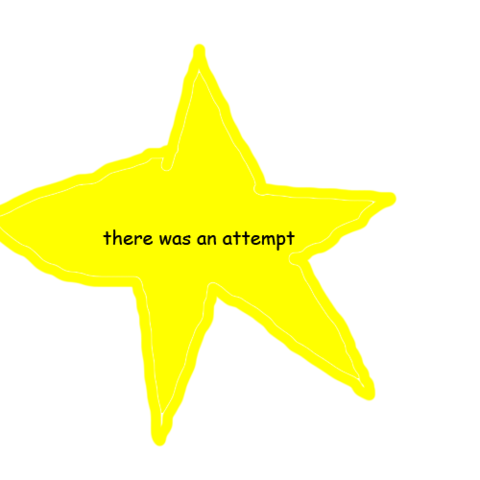

In [49]:
Image("https://i.pinimg.com/originals/73/92/28/739228bc3981c1a419c8c5480d5baf42.png")